# Importando bibliotecas e csv

Para a análise exploratória, iremos trabalhar em Python, utilizando principalmente a biblioteca *Pandas*, que permite a manipulação de estruturas de dados em dataframes de forma prática. Para a visualização de gráficos, faremos uso principalmente da biblioteca *matplotlib* e *seaborn*.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import plotly.express as px

df = pd.read_csv('exams.csv')

# Categorias

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


Antes de começar, é importante entender com quais variáveis nosso dataset é composto, para isso podemos criar um loop que recolhe o nome de cada coluna do dataframe e os objetos únicos em cada um.

In [5]:
nomes = []
for c in df.columns:
    if df[c].dtype in ["object"]:
        nomes.append(c)
        print(f"{c}\n{df[c].unique()}\n")
        

gender
['male' 'female']

race/ethnicity
['group A' 'group D' 'group E' 'group B' 'group C']

parental level of education
['high school' 'some high school' 'some college' "associate's degree"
 "bachelor's degree" "master's degree"]

lunch
['standard' 'free/reduced']

test preparation course
['completed' 'none']



Existem 5 categorias no dataset, dentre elas, 2 classificadores:
- Sexo <br>
- Raça/Etnia <br>

E 3 fatores: <br>
- Nível parental de educação <br>
- Lanche <br>
- Curso Preparatório <br>

# Valores Ausentes e Duplicados

Nas operações a seguir iremos verificar a existências de valores nulos e duplicados no dataset. 

Para encontrar valores nulos, é possível usar a função "df.isna()" e "df.isnull()" do *Pandas* e somar o número de valores nulos em cada categoria. A partir desse valor, dividindo pelo tamanho do dataframe também é possível calcular a respectiva porcentagem.

In [12]:
null_table = pd.DataFrame({
    'Nulo':df.isna().sum(),
    '% Nulo':df.isna().sum() / len(df),
})

display(null_table)

,Nulo,% Nulo
gender,0,0.0
race/ethnicity,0,0.0
parental level of education,0,0.0
lunch,0,0.0
test preparation course,0,0.0
math score,0,0.0
reading score,0,0.0
writing score,0,0.0


In [13]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Como visto acima, não há valores nulos no dataframe. Para encontrar valores duplicados, podemos usar a função "df.duplicated()" do *Pandas* e somar o número de valores duplicados no dataframe.

In [14]:
df.duplicated().sum()

1

Existe 1 valor duplicado no dataset que pode ser rapidamente removido:

In [15]:
df.drop_duplicates(inplace=True)

# Renomeando Valores

O próximo passo é renomear o nome das colunas do dataset, além de traduzir para o português, é essencial evitar erros em funções por causa de espaços ou caracteres especiais. Os objetos dentro de cada categoria não serão manipulados individualmente então poderão manter espaço. Também foi feito um agrupamento com as 3 matérias em questão: matemática, leitura e redação. 

In [48]:
df=df.rename(columns={"gender":"sexo",
                      "race/ethnicity":"grupo_etnico",
                      "parental level of education":"educ_parental",
                      "lunch":"lanche",
                      "test preparation course":"curso_preparatorio",
                      "math score":"notas_matematica",
                      "reading score":"notas_leitura",
                      "writing score":"notas_redacao"})

df['sexo']=df['sexo'].replace({'male': 'Homem',
                               'female': 'Mulher'})

df['grupo_etnico']=df['grupo_etnico'].replace({'group A': 'Grupo A',
                                               'group B': 'Grupo B',
                                               'group C': 'Grupo C',
                                               'group D': 'Grupo D',
                                               'group E': 'Grupo E'})

df['educ_parental']=df['educ_parental'].replace({'high school': "Ensino Médio",
                                                 'some high school':'Ensino Médio Incompleto',
                                                 'some college':'Faculdade Incompleta',
                                                 "associate's degree":"Grau de Associado",
                                                 "bachelor's degree":"Bacharel",
                                                 "master's degree":"Mestrado"})

df['lanche']=df['lanche'].replace({'standard':'Sem Desconto',
                                   'free/reduced':'Com Desconto'})

df['curso_preparatorio']=df['curso_preparatorio'].replace({'completed':'Completo',
                                                           'none':'Nenhum'})

In [49]:
materias = {'notas_matematica':'Matemática', 'notas_leitura':'Leitura', 'notas_redacao':'Redação'}

In [51]:
fator_especifico = "Com Desconto"
fator_type = "Lanche"
fator_dataset = list(fatores.keys())[list(fatores.values()).index(fator_type)]
print(fator_dataset)

lanche


In [59]:
 query = str(f"{fator_dataset} == '{fator_especifico}'")

In [65]:
print(f"{query}")

lanche == 'Com Desconto'


In [66]:
df_s = df.query(query)
df_s.head()

,sexo,grupo_etnico,educ_parental,lanche,curso_preparatorio,notas_matematica,notas_leitura,notas_redacao
1,Mulher,Grupo D,Ensino Médio Incompleto,Com Desconto,Nenhum,40,59,55
2,Homem,Grupo E,Faculdade Incompleta,Com Desconto,Nenhum,59,60,50
9,Homem,Grupo C,Faculdade Incompleta,Com Desconto,Nenhum,47,42,45
15,Homem,Grupo E,Grau de Associado,Com Desconto,Nenhum,69,61,57
18,Mulher,Grupo C,Grau de Associado,Com Desconto,Nenhum,23,44,44


In [44]:
df.head()

,sexo,grupo_etnico,educ_parental,lanche,curso_preparatorio,notas_matematica,notas_leitura,notas_redacao
0,Homem,Grupo A,Ensino Médio,Sem Desconto,Completo,67,67,63
1,Mulher,Grupo D,Ensino Médio Incompleto,Com Desconto,Nenhum,40,59,55
2,Homem,Grupo E,Faculdade Incompleta,Com Desconto,Nenhum,59,60,50
3,Homem,Grupo B,Ensino Médio,Sem Desconto,Nenhum,77,78,68
4,Homem,Grupo E,Grau de Associado,Sem Desconto,Completo,78,73,68


In [45]:
df[df.grupo_etnico=='Grupo A'].head()

,sexo,grupo_etnico,educ_parental,lanche,curso_preparatorio,notas_matematica,notas_leitura,notas_redacao
0,Homem,Grupo A,Ensino Médio,Sem Desconto,Completo,67,67,63
6,Mulher,Grupo A,Bacharel,Sem Desconto,Nenhum,62,59,63
29,Mulher,Grupo A,Ensino Médio Incompleto,Com Desconto,Nenhum,33,54,51
31,Homem,Grupo A,Bacharel,Com Desconto,Nenhum,78,74,73
32,Homem,Grupo A,Ensino Médio Incompleto,Com Desconto,Completo,40,41,39


# Samples

Podemos observar no novo cabeçário e cauda do dataset que as categorias e objetos foram renomeados corretamente.

In [46]:
df.head()

,sexo,grupo_etnico,educ_parental,lanche,curso_preparatorio,notas_matematica,notas_leitura,notas_redacao
0,Homem,Grupo A,Ensino Médio,Sem Desconto,Completo,67,67,63
1,Mulher,Grupo D,Ensino Médio Incompleto,Com Desconto,Nenhum,40,59,55
2,Homem,Grupo E,Faculdade Incompleta,Com Desconto,Nenhum,59,60,50
3,Homem,Grupo B,Ensino Médio,Sem Desconto,Nenhum,77,78,68
4,Homem,Grupo E,Grau de Associado,Sem Desconto,Completo,78,73,68


In [11]:
df.tail()

,sexo,grupo_etnico,educ_parental,lanche,curso_preparatorio,notas_matematica,notas_leitura,notas_redacao
995,Homem,Grupo C,Ensino Médio,Sem Desconto,Nenhum,73,70,65
996,Homem,Grupo D,Grau de Associado,Com Desconto,Completo,85,91,92
997,Mulher,Grupo C,Ensino Médio Incompleto,Com Desconto,Nenhum,32,35,41
998,Mulher,Grupo C,Faculdade Incompleta,Sem Desconto,Nenhum,73,74,82
999,Homem,Grupo A,Faculdade Incompleta,Sem Desconto,Completo,65,60,62


# Informações do dataset

Começamos a coletar informações básicas do dataframe como tamanho, agora com 999 linhas. 

In [12]:
df.shape

(999, 8)

Com a descrição, podemos ter uma prévia da média e do desvio padrão encontrados para cada matéria no total de estudantes, assim como os quartis, a nota mínima e a nota máxima.

In [13]:
df.describe()

,notas_matematica,notas_leitura,notas_redacao
count,999.000000,999.000000,999.000000
mean,66.362362,68.970971,67.705706
std,15.373794,14.711935,15.575322
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.000000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   sexo                999 non-null    object
 1   grupo_etnico        999 non-null    object
 2   educ_parental       999 non-null    object
 3   lanche              999 non-null    object
 4   curso_preparatorio  999 non-null    object
 5   notas_matematica    999 non-null    int64 
 6   notas_leitura       999 non-null    int64 
 7   notas_redacao       999 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 70.2+ KB


## Média

A média de cada matéria podem ser calculadas com o comando ".mean()"

In [15]:
for c in list(materias.keys()):
    print(f"Média de {materias.get(c)}\n{df[c].mean()}\n")

Média de Matemática
66.36236236236236

Média de Leitura
68.97097097097097

Média de Redação
67.70570570570571



Podemos calcular a média por grupo étnico e por sexo.

In [17]:
for c in materias.keys():
    print(f"Média de {materias.get(c)}\n{df.groupby(['sexo'])[c].mean()} \n")
    print(df.groupby(['grupo_etnico'])[c].mean())
    print("\n")

Média de Matemática
sexo
Homem     69.325581
Mulher    63.196687
Name: notas_matematica, dtype: float64 

grupo_etnico
Grupo A    65.215190
Grupo B    63.170732
Grupo C    63.130031
Grupo D    69.267176
Grupo E    74.269231
Name: notas_matematica, dtype: float64


Média de Leitura
sexo
Homem     66.240310
Mulher    71.888199
Name: notas_leitura, dtype: float64 

grupo_etnico
Grupo A    68.556962
Grupo B    67.102439
Grupo C    66.383901
Grupo D    72.087786
Grupo E    72.315385
Name: notas_leitura, dtype: float64


Média de Redação
sexo
Homem     63.959302
Mulher    71.708075
Name: notas_redacao, dtype: float64 

grupo_etnico
Grupo A    66.974684
Grupo B    65.736585
Grupo C    64.523220
Grupo D    72.259542
Grupo E    69.984615
Name: notas_redacao, dtype: float64




Observa-se que as médias estão próximas idependente do grupo ou sexo selecionado. O grupo E teve um desempenho relativamente superior em matemática e o grupo D teve um desempenho levemente superior em redação. Observa-se também que mulheres tiveram um desempenho maior em leitura e redação, enquanto homens tiveram um desempenho maior em matemática. Isso pode levar à dúvida de se é possível identificar uma relação entre esses resultados e os fatores que serão analisados.

### Comparando MÉDIA de estudantes para NÍVEL PARENTAL DE EDUCAÇÃO

Visto que inicialmente queremos ter uma visão superficial dos fatores, vamos comparar o nível parental de educação mais baixo com o mais alto.

In [18]:
dfx = df.query(
    "educ_parental == 'Ensino Médio Incompleto'"
)

for c in materias.keys():
    print(f"Média de {materias.get(c)}\n{dfx.groupby(['sexo'])[c].mean()} \n")
    print(dfx.groupby(['grupo_etnico'])[c].mean())
    print("\n")

Média de Matemática
sexo
Homem     65.578313
Mulher    56.953704
Name: notas_matematica, dtype: float64 

grupo_etnico
Grupo A    53.909091
Grupo B    59.657895
Grupo C    58.212121
Grupo D    62.960784
Grupo E    67.240000
Name: notas_matematica, dtype: float64


Média de Leitura
sexo
Homem     61.987952
Mulher    66.268519
Name: notas_leitura, dtype: float64 

grupo_etnico
Grupo A    57.181818
Grupo B    63.657895
Grupo C    63.333333
Grupo D    65.882353
Grupo E    68.560000
Name: notas_leitura, dtype: float64


Média de Redação
sexo
Homem     59.144578
Mulher    65.148148
Name: notas_redacao, dtype: float64 

grupo_etnico
Grupo A    54.545455
Grupo B    61.868421
Grupo C    61.030303
Grupo D    65.235294
Grupo E    65.560000
Name: notas_redacao, dtype: float64




In [19]:
dfx = df.query(
    "educ_parental == 'Mestrado'"
)

for c in materias.keys():
    print(f"Média de {materias.get(c)}\n{dfx.groupby(['sexo'])[c].mean()} \n")
    print(dfx.groupby(['grupo_etnico'])[c].mean())
    print("\n")

Média de Matemática
sexo
Homem     71.75000
Mulher    71.47619
Name: notas_matematica, dtype: float64 

grupo_etnico
Grupo A    64.250000
Grupo B    73.210526
Grupo C    68.300000
Grupo D    76.250000
Grupo E    74.285714
Name: notas_matematica, dtype: float64


Média de Leitura
sexo
Homem     69.071429
Mulher    79.666667
Name: notas_leitura, dtype: float64 

grupo_etnico
Grupo A    69.375000
Grupo B    75.684211
Grupo C    74.400000
Grupo D    79.500000
Grupo E    75.285714
Name: notas_leitura, dtype: float64


Média de Redação
sexo
Homem     68.25000
Mulher    80.97619
Name: notas_redacao, dtype: float64 

grupo_etnico
Grupo A    68.625000
Grupo B    75.684211
Grupo C    73.800000
Grupo D    82.250000
Grupo E    76.142857
Name: notas_redacao, dtype: float64




Todas as médias de estudantes com pais que tem mestrado foram significativamente superiores às médias de estudantes com pais sem ensino médio completo, idependente de sexo e grupo étnico. Mas será que essa relação se matém para os outros níveis? E será que  para cada categoria a discrepância é a mesma?

### Comparando MÉDIA de estudantes com LANCHE COM e SEM desconto

In [21]:
dfx = df.query(
    "lanche == 'Com Desconto'"
)

for c in materias.keys():
    print(f"Média de {materias.get(c)}\n{dfx.groupby(['sexo'])[c].mean()} \n")
    print(dfx.groupby(['grupo_etnico'])[c].mean())
    print("\n")

Média de Matemática
sexo
Homem     61.675532
Mulher    54.781250
Name: notas_matematica, dtype: float64 

grupo_etnico
Grupo A    54.076923
Grupo B    55.442857
Grupo C    55.426087
Grupo D    59.871795
Grupo E    68.288136
Name: notas_matematica, dtype: float64


Média de Leitura
sexo
Homem     60.696809
Mulher    66.118750
Name: notas_leitura, dtype: float64 

grupo_etnico
Grupo A    58.730769
Grupo B    62.628571
Grupo C    60.539130
Grupo D    66.166667
Grupo E    67.050847
Name: notas_leitura, dtype: float64


Média de Redação
sexo
Homem     57.345745
Mulher    65.131250
Name: notas_redacao, dtype: float64 

grupo_etnico
Grupo A    56.000000
Grupo B    60.171429
Grupo C    57.634783
Grupo D    65.269231
Grupo E    64.661017
Name: notas_redacao, dtype: float64




In [22]:
dfx = df.query(
    "lanche == 'Sem Desconto'"
)

for c in materias.keys():
    print(f"Média de {materias.get(c)}\n{dfx.groupby(['sexo'])[c].mean()} \n")
    print(dfx.groupby(['grupo_etnico'])[c].mean())
    print("\n")

Média de Matemática
sexo
Homem     73.710366
Mulher    67.365325
Name: notas_matematica, dtype: float64 

grupo_etnico
Grupo A    70.679245
Grupo B    67.177778
Grupo C    67.389423
Grupo D    73.250000
Grupo E    79.239437
Name: notas_matematica, dtype: float64


Média de Leitura
sexo
Homem     69.417683
Mulher    74.746130
Name: notas_leitura, dtype: float64 

grupo_etnico
Grupo A    73.377358
Grupo B    69.422222
Grupo C    69.615385
Grupo D    74.597826
Grupo E    76.690141
Name: notas_leitura, dtype: float64


Média de Redação
sexo
Homem     67.750000
Mulher    74.965944
Name: notas_redacao, dtype: float64 

grupo_etnico
Grupo A    72.358491
Grupo B    68.622222
Grupo C    68.331731
Grupo D    75.222826
Grupo E    74.408451
Name: notas_redacao, dtype: float64




Podemos ver que *todas* as médias de alunos que tem lanche com desconto são menores do que alunos sem desconto, idependente do sexo e grupo étnico. Isso nos leva a questionar se é possível estabelecer alguma relação entre esse fator e o desempenho.

### Comparando MÉDIA de estudantes COM e SEM CURSO PREPARATÓRIO

In [23]:
dfx = df.query(
    "curso_preparatorio == 'Nenhum'"
)

for c in materias.keys():
    print(f"Média de {materias.get(c)}\n{dfx.groupby(['sexo'])[c].mean()} \n")
    print(dfx.groupby(['grupo_etnico'])[c].mean())
    print("\n")

Média de Matemática
sexo
Homem     67.456140
Mulher    61.860681
Name: notas_matematica, dtype: float64 

grupo_etnico
Grupo A    62.191489
Grupo B    61.195489
Grupo C    62.167421
Grupo D    67.348315
Grupo E    72.813953
Name: notas_matematica, dtype: float64


Média de Leitura
sexo
Homem     63.190058
Mulher    69.879257
Name: notas_leitura, dtype: float64 

grupo_etnico
Grupo A    63.936170
Grupo B    64.609023
Grupo C    63.823529
Grupo D    69.904494
Grupo E    70.186047
Name: notas_leitura, dtype: float64


Média de Redação
sexo
Homem     60.073099
Mulher    68.662539
Name: notas_redacao, dtype: float64 

grupo_etnico
Grupo A    61.723404
Grupo B    61.962406
Grupo C    61.076923
Grupo D    69.241573
Grupo E    66.953488
Name: notas_redacao, dtype: float64




In [24]:
dfx = df.query(
    "curso_preparatorio == 'Completo'"
)

for c in materias.keys():
    print(f"Média de {materias.get(c)}\n{dfx.groupby(['sexo'])[c].mean()} \n")
    print(dfx.groupby(['grupo_etnico'])[c].mean())
    print("\n")

Média de Matemática
sexo
Homem     73.00000
Mulher    65.89375
Name: notas_matematica, dtype: float64 

grupo_etnico
Grupo A    69.656250
Grupo B    66.819444
Grupo C    65.215686
Grupo D    73.333333
Grupo E    77.113636
Name: notas_matematica, dtype: float64


Média de Leitura
sexo
Homem     72.235632
Mulher    75.943750
Name: notas_leitura, dtype: float64 

grupo_etnico
Grupo A    75.343750
Grupo B    71.708333
Grupo C    71.931373
Grupo D    76.714286
Grupo E    76.477273
Name: notas_leitura, dtype: float64


Média de Redação
sexo
Homem     71.597701
Mulher    77.856250
Name: notas_redacao, dtype: float64 

grupo_etnico
Grupo A    74.687500
Grupo B    72.708333
Grupo C    71.990196
Grupo D    78.654762
Grupo E    75.909091
Name: notas_redacao, dtype: float64




Por último, estudantes com o curso preparatório completo também tiveram uma média maior do que estudantes sem o curso.

## Mediana e Moda

A mediana de cada matéria pode ser calculanas com o comando ".median()"

In [25]:
for c in materias:
    print(f"Mediana de {materias.get(c)}\n{df[c].median()}\n")

Mediana de Matemática
66.0

Mediana de Leitura
70.0

Mediana de Redação
68.0



A moda de cada matéria pode ser calculanas com o comando ".mode()"

In [26]:
for c in materias.keys():
    print(f"Moda de {materias.get(c)}\n{df[c].mode()}\n")

Moda de Matemática
0    63
dtype: int64

Moda de Leitura
0    71
dtype: int64

Moda de Redação
0    64
1    71
dtype: int64



A mediana não será analisada por não trazer informações do dataset como um todo, especialmente por contagens diferentes de alunos para diferentes notas. Como visto abaixo, a frequência de alunos a cada 10 pontos se dá de forma diferente em cada barra.
As modas encontradas estão coerentes com os gráficos.

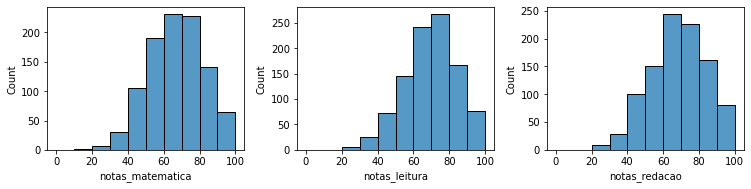

In [27]:
plt.figure(figsize=(14,10))
for i,col in enumerate(list(materias.keys())):
    axes = plt.subplot(4,4, i + 1)
    sns.histplot(x=df[col],bins=[0,10,20,30,40,50,60,70,80,90,100])

plt.tight_layout()
plt.show()

## Desvio Padrão

O desvio padrão de cada matéria pode ser calculanas com o comando ".std()"

In [28]:
for c in materias.keys():
    print(f"Desvio Padrão de {materias.get(c)}\n{df[c].std()}\n")

Desvio Padrão de Matemática
15.37379367263012

Desvio Padrão de Leitura
14.711935298886944

Desvio Padrão de Redação
15.575322108870427



Podemos calcular o desvio padrão por grupo étnico e por sexo.

In [29]:
for c in materias.keys():
    print(f"Desvio Padrão de {materias.get(c)}\n{df.groupby(['sexo'])[c].std()} \n")
    print(dfx.groupby(['grupo_etnico'])[c].std())
    print("\n")

Desvio Padrão de Matemática
sexo
Homem     14.671636
Mulher    15.490079
Name: notas_matematica, dtype: float64 

grupo_etnico
Grupo A    14.095548
Grupo B    13.939837
Grupo C    14.578994
Grupo D    14.283138
Grupo E    16.627542
Name: notas_matematica, dtype: float64


Desvio Padrão de Leitura
sexo
Homem     14.241618
Mulher    14.660470
Name: notas_leitura, dtype: float64 

grupo_etnico
Grupo A    13.729200
Grupo B    12.192629
Grupo C    13.395921
Grupo D    14.515112
Grupo E    14.005794
Name: notas_leitura, dtype: float64


Desvio Padrão de Redação
sexo
Homem     14.956646
Mulher    15.238072
Name: notas_redacao, dtype: float64 

grupo_etnico
Grupo A    15.072807
Grupo B    12.323615
Grupo C    13.760681
Grupo D    14.311924
Grupo E    15.000493
Name: notas_redacao, dtype: float64




O desvio padrão é praticamente o mesmo em todas as matérias para ambos sexos, entretando tem pequenas variações em alguns grupos étnicos. É possível que haja a existência de Outliers, então vamos criar gráficos de dispersão para visualizar melhor cada situação

## Gráficos de Dispersão

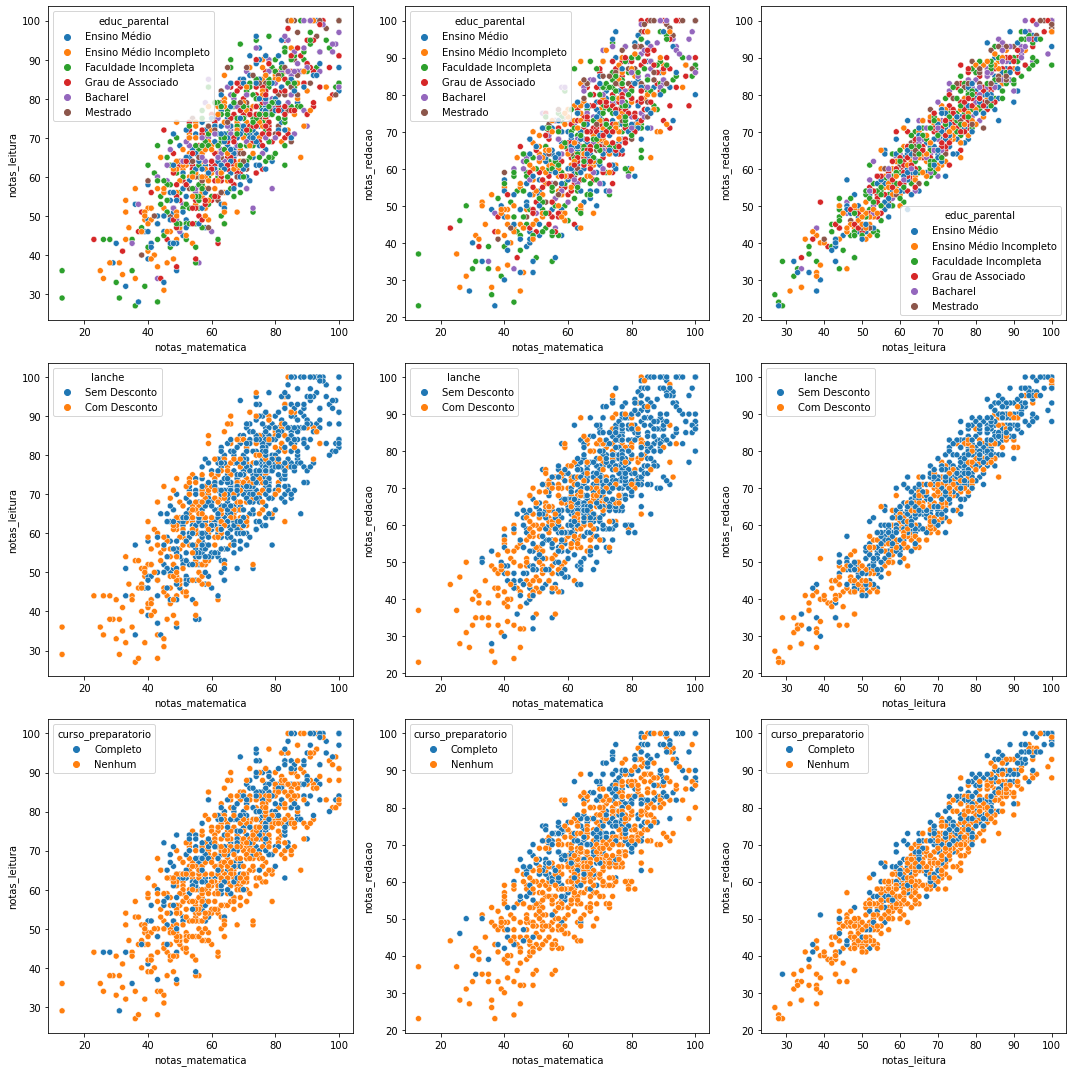

In [30]:
fatores = ["educ_parental","lanche","curso_preparatorio"]
lista_materiais = list(materias.keys())
pares = [[lista_materiais[0], lista_materiais[1]], 
         [lista_materiais[0], lista_materiais[2]], 
         [lista_materiais[1], lista_materiais[2]]]

fix, ax = plt.subplots(figsize=(15,15), nrows=3, ncols=3)

for i,p in enumerate(pares):
    for j,hue in enumerate(fatores):
        sns.scatterplot(data=df, x=p[0], y=p[1], hue=hue, ax=ax[j,i])

plt.tight_layout()
plt.show()

Gráficos de dispersão para um grande número de estudantes não fornecem quantidades precisas, mas ajudam a entender se a relação estabelecida para cada fator segue conforme as ideias geradas no cálculo de médias, assim como, ajuda a observar a existência de possíveis outliers. 

Observando os gráficos acima, notamos que mesmo o fluxo estando de acordo, no fator "Educação Parental", os estudantes com pais de cada nível estão mais dispersos do que imaginávamos. É possível encontrar inúmeros estudantes com pais de todos os níveis ao longo de cada nota em todas as relações entre matérias. No fator de "Lanche" por outro lado, é visível a divisão de estudantes com lanche sem desconto e com desconto idependente da matéria. Por fim, no fator de "Curso Preparatório", as categorias estão um pouco mescladas com uma leve vantagem para estudantes com o curso completo, visto que os dados azuis estão uniformemente acima dos dados laranja.

Curiosamente, é evidente como todos os gráficos que relacionam as notas de Leitura e Redação estão bem compactos, idependente do fator.

## Correlação

Podemos encontrar a tabela de correlação dos valores numéricos do dataset, neste caso as notas, usando o comando "corr()".

<AxesSubplot:>

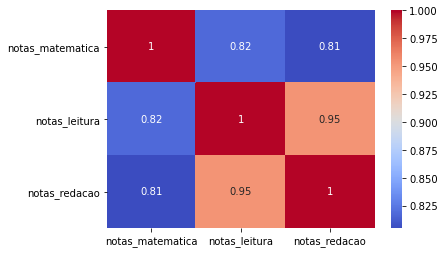

In [31]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

Pela tabela, confirma-se que as matérias possuem correlação alta entre si, especialmente entre redação e leitura que tiveram 0.95 de correlação. Isso significa que os estudantes mantém uma homogeneidade de desempenho, alunos com uma nota em uma matéria têm uma forte tendência a manter o padrão para as outras matérias.

Essa informação sugere que para as análises, a matéria selecionada não será um fator decisivo.

# Proposta da análise exploratória

O dataset escolhido gira em torno do desempenho de estudantes em algumas matérias. Visto isso, a proposta da análise exploratória é analisar a eficácia de fatores que podem influenciar na performance de diferentes grupos de estudantes. 
Nosso objetivo é responder perguntas como:

1) Quais fatores são relevantes para o desempenho? <br>
2) Esses fatores tem resultados diferentes por grupo étnico? <br>
3) Esses fatores tem resultados diferentes por sexo? <br>

Visto isso, iremos realizar operações para gerar gráficos que sejam capazes de não apenas responder essas perguntas, mas possibilitar qualquer pessoa de tirar suas conclusões selecionando as codições desejadas para cada fator em um dashboard.

O dashboard é uma excelente ferramenta de visualização que traz consigo os gráficos e informações mais essenciais para atender uma proposta. O dashboard será **analítico** e interativo, visto que não está monitorando dados em tempo real, e sim dados já previamente fixados. Além disso, o objetivo é explorar pelos fatores para fazer diversas análises, e também visa oferecer liberdade ao usuário em filtrar o grupo de estudantes analisado através de filtros de múltipla escolha para os classificadores (sexo e grupo étnico), assim como poder selecionar uma matéria.

Ele será feito através do *Streamlit*, uma estrutura baseada em *Python* feita para desenvolver e implantar painéis interativos de ciência de dados e modelos de aprendizado de máquinas. 

## Contagem de Estudantes

Antes de começar, é importante ter certeza do número de estudantes para cada categoria e como vamos lidar com isso nas análises e gráficos.

Como foi constatado previamente, o grupo de estudantes divide-se por sexo com os seguintes valores:

In [32]:
df['sexo'].value_counts()

Homem     516
Mulher    483
Name: sexo, dtype: int64

E por 5 grupos étnicos:

In [33]:
df['grupo_etnico'].value_counts()

Grupo C    323
Grupo D    262
Grupo B    205
Grupo E    130
Grupo A     79
Name: grupo_etnico, dtype: int64

Também podemos encontrar o número de estudantes em cada grupo para um sexo específico e analogamente, o número de estudantes em cada sexo para um grupo específico.

In [34]:
sexo = "Mulher"
df[df.sexo==sexo].grupo_etnico.value_counts()

Grupo C    154
Grupo D    126
Grupo B    114
Grupo E     52
Grupo A     37
Name: grupo_etnico, dtype: int64

In [35]:
grupo_etnico = "Grupo C"
df[df.grupo_etnico==grupo_etnico].sexo.value_counts()

Homem     169
Mulher    154
Name: sexo, dtype: int64

Ainda é possível combinar ambas categorias para encontrar o número de estudantes de um sexo específico em um grupo específico.

In [36]:
sexo = "Mulher"
grupo = "Grupo C"
# Mulheres no Grupo C

df[df.grupo_etnico==grupo][df[df.grupo_etnico==grupo].sexo==sexo].grupo_etnico.value_counts()

Grupo C    154
Name: grupo_etnico, dtype: int64

## Visualização da contagem de estudantes

### Pie Chart (Gráfico de pizza)

In [59]:
race_pie = px.pie(df, values = df['grupo_etnico'].value_counts().values, names = df['grupo_etnico'].value_counts().index)
race_pie.show()

In [60]:
race_pie = px.pie(df, values = df['sexo'].value_counts().values, names = df['sexo'].value_counts().index)
race_pie.show()

Homens e Mulheres estão relativamente bem divididos, cada um bem próximo da metade do número de estudantes. Já nos grupos étnicos, a contagem é bem diferente para cada um, especialmente pelo maior grupo, "Grupo C", que ocupa cerca de $\frac{1}{3}$ do total de estudantes, enquanto o menor grupo, "Grupo A", que não chega nem em $\frac{1}{10}$ do total.
Sendo assim, para o nosso primeiro gráfico analítico, iremos usar um gráfico de barras para plotar um histograma, uma ferramenta eficaz para medir desempenho. Pela diferença de contagem, nosso eixo "y" sempre medirá os estudantes em probabilidade/porcentagem para mantermos a mesma proporção em todas as situações.

### Definindo a ordem de cada categoria

É conveniente já estabelecer uma relação de ordem entre todas as listas, seja de fator ou classificador, pois na hora de plotar os gráficos haverá uma visualização mais limpa das relações entre os objetos de cada lista.

In [71]:
order_grupo_etnico = ["Grupo A", "Grupo B","Grupo C","Grupo D","Grupo E"]
order_educ_parental = ["Ensino Médio Incompleto", "Ensino Médio", "Faculdade Incompleta","Grau de Associado", "Bacharel","Mestrado"]
order_lanche = ["Sem Desconto", "Com Desconto"]
order_curso_preparatorio = ["Nenhum", "Completo"]

## Horizontal Bar Chart (Gráfico de Barra Horizontal)

O gráfico de barras horizontal foi escolhido para comparar como os fatores aparecem em alguma configuração, dando ênfase na clara relação entre os objetos de cada fator que pode ser vista no gráfico e definida pelo usuário. Em suma, o gráfico horizontal facilita a leitura desses fatores.
Isso nos dá informações sobre a pergunta 2) e 3), visto que o usuário também poderá filtrar o grupo, sexo e até a matéria caso desejado.

A seguir podemos visualizar algumas variações para cada fator em cada grupo na matéria de matemática.

### Educação Parental

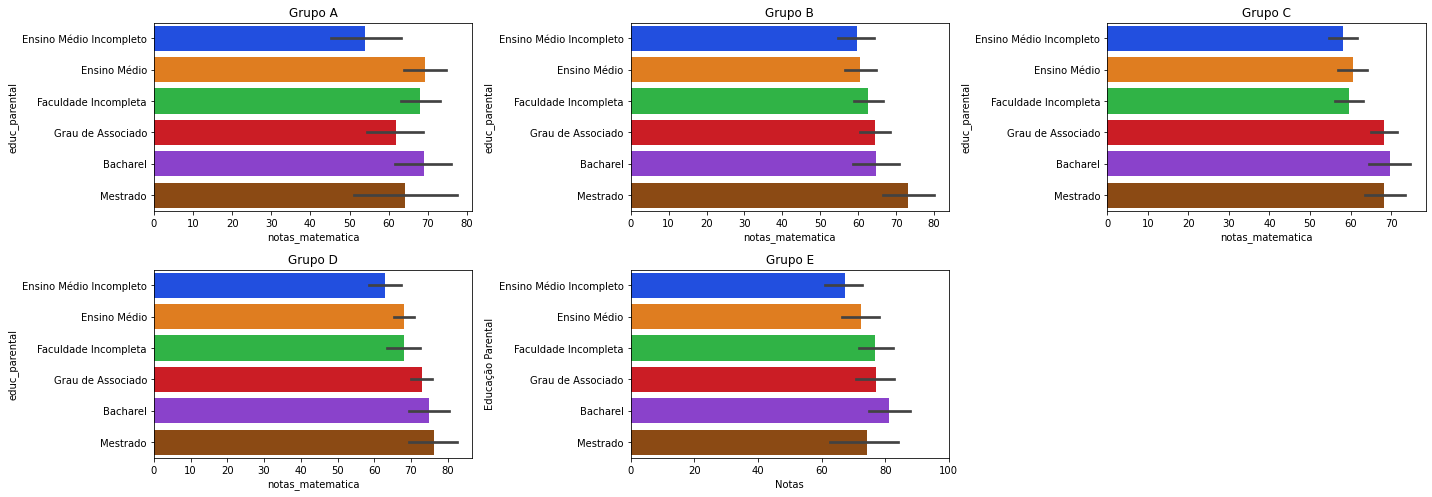

In [99]:
materia = "notas_matematica"
grupos = ['Grupo A', 'Grupo B', 'Grupo C', 'Grupo D', 'Grupo E']

plt.figure(figsize=(20,10))
for i,col in enumerate(grupos):
    query = str(f"grupo_etnico == '{col}'")
    dfx = df.query(query)
    axes = plt.subplot(3,3, i + 1)
    plt.title(col)
    sns.barplot(data=dfx, x=materia, y="educ_parental",palette="bright",order= order_educ_parental)

plt.xlabel("Notas")
plt.ylabel("Educação Parental")

plt.xlim(0, 100)
plt.tight_layout()
plt.show()

### Lanche

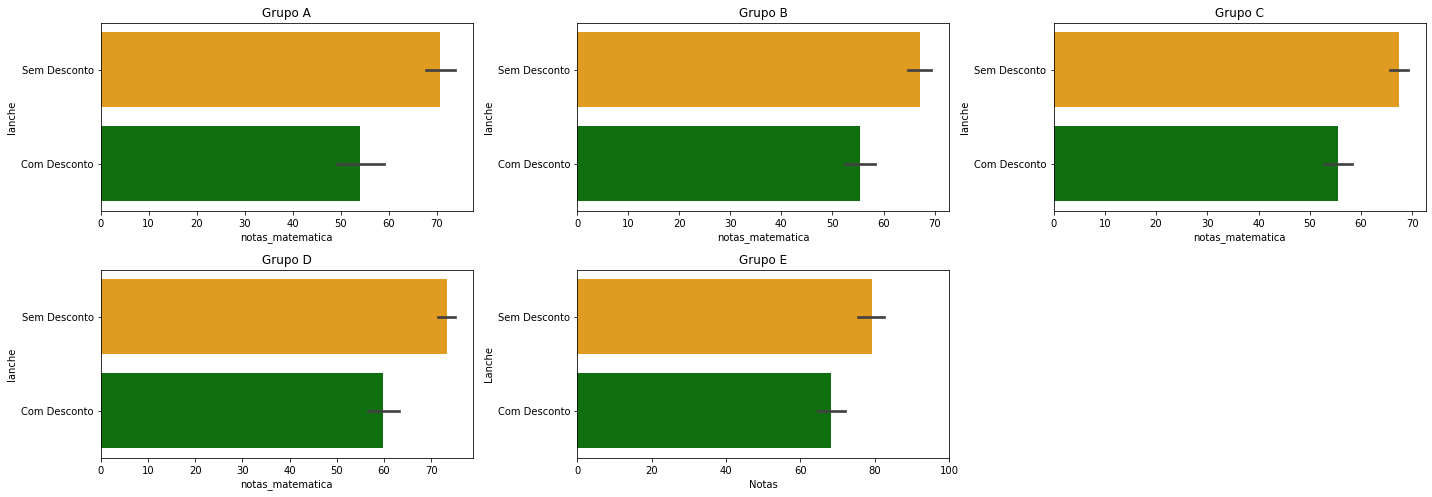

In [102]:
materia = "notas_matematica"
grupos = ['Grupo A', 'Grupo B', 'Grupo C', 'Grupo D', 'Grupo E']

plt.figure(figsize=(20,10))
for i,col in enumerate(grupos):
    query = str(f"grupo_etnico == '{col}'")
    dfx = df.query(query)
    axes = plt.subplot(3,3, i + 1)
    plt.title(col)
    sns.barplot(data=dfx, x=materia, y="lanche",palette=["orange", "green"],order= order_lanche)

plt.xlabel("Notas")
plt.ylabel("Lanche")
plt.xlim(0, 100)
plt.tight_layout()
plt.show()

### Curso Preparatório

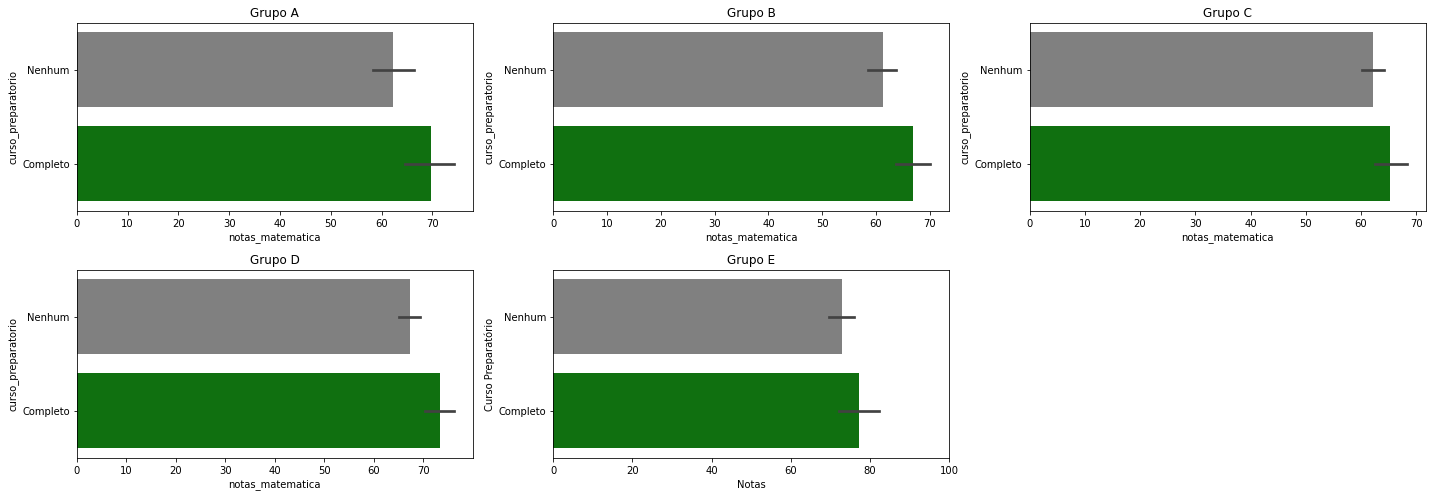

In [107]:
materia = "notas_matematica"
grupos = ['Grupo A', 'Grupo B', 'Grupo C', 'Grupo D', 'Grupo E']

plt.figure(figsize=(20,10))
for i,col in enumerate(grupos):
    query = str(f"grupo_etnico == '{col}'")
    dfx = df.query(query)
    axes = plt.subplot(3,3, i + 1)
    plt.title(col)
    sns.barplot(data=dfx, x=materia, y="curso_preparatorio",palette=["grey", "green"],order= order_curso_preparatorio)

plt.xlabel("Notas")
plt.ylabel("Curso Preparatório")
plt.xlim(0, 100)
plt.tight_layout()
plt.show()

## Performance em Bar Chart (Gráfico de barras)

Histogramas são uma ferramenta eficaz quando falamos de desempenho, visto isso, separamos os histogramas em "com hue" e "sem hue", onde o primeiro mostra como os objetos de cada fator para o total de estudantes e o segundo separa esse grupo por sexo. Neste caso as notas por sexo se sobreporem, assim é possível visualizar como o desempenhos dos estudantes aparece para os objetos em cada categoria, e além disso, como os fatores se comportam por sexo, o que também nos ajuda a responder as perguntas 2) e 3). Desta vez, dando ênfase nos valores numéricos das notas em cada cofiguração. No dashboard o usuário também terá opção de selecionar um grupo e uma matéria caso desejado.

### Histogramas de cada matéria para todos os estudantes

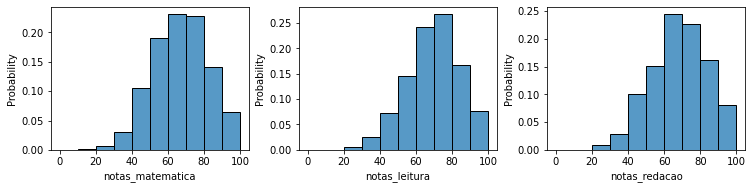

In [76]:
plt.figure(figsize=(14,10))
for i,col in enumerate(list(materias.keys())):
    axes = plt.subplot(4,4, i + 1)
    sns.histplot(x=df[col], stat="probability",bins=[0,10,20,30,40,50,60,70,80,90,100])

plt.tight_layout()
plt.show()

### Histogramas de cada matéria para todos os grupos por sexo

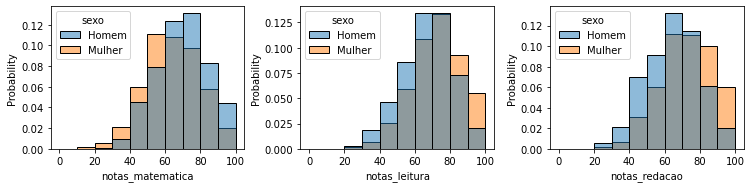

In [77]:
plt.figure(figsize=(14,10))
for i,col in enumerate(list(materias.keys())):
    axes = plt.subplot(4,4, i + 1)
    sns.histplot(x=df[col], hue=df["sexo"], stat="probability",bins=[0,10,20,30,40,50,60,70,80,90,100])

plt.tight_layout()
plt.show()

Previamente concluímos que as matérias não são um fator decisivo em nossa análise, então, vamos visualizar por enquanto cada fator em função da média de todas as matérias no total de estudantes e também, outros gráficos por sexo. Para isso basta criar uma nova coluna no dataframe com as médias de cada aluno.

In [78]:
df['media'] = df[['notas_matematica', 'notas_leitura', 'notas_redacao']].mean(axis=1)

### Histogramas de notas para estudantes COM e SEM lanche com desconto

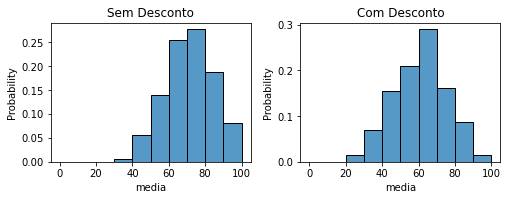

In [79]:
plt.figure(figsize=(14,10))
for i,col in enumerate(order_lanche):
    if col == "Com Desconto":
        dfx = df.query("lanche == 'Com Desconto'")
    else:
        dfx = df.query("lanche == 'Sem Desconto'")
    axes = plt.subplot(4,4, i + 1)
    sns.histplot(x=dfx["media"], stat="probability",bins=[0,10,20,30,40,50,60,70,80,90,100]).set(title= col)

plt.tight_layout()
plt.show()

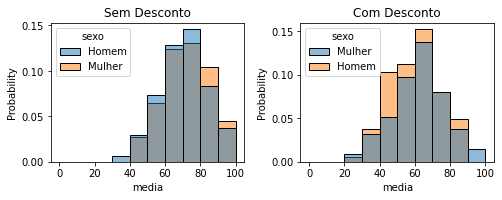

In [42]:
plt.figure(figsize=(14,10))
for i,col in enumerate(order_lanche):
    if col == "Com Desconto":
        dfx = df.query("lanche == 'Com Desconto'")
    else:
        dfx = df.query("lanche == 'Sem Desconto'")
    axes = plt.subplot(4,4, i + 1)
    sns.histplot(x=dfx["media"], hue=dfx["sexo"], stat="probability",bins=[0,10,20,30,40,50,60,70,80,90,100]).set(title= col)

plt.tight_layout()
plt.show()

### Histograma de notas para estudantes com pais de cada NÍVEL educacional parental

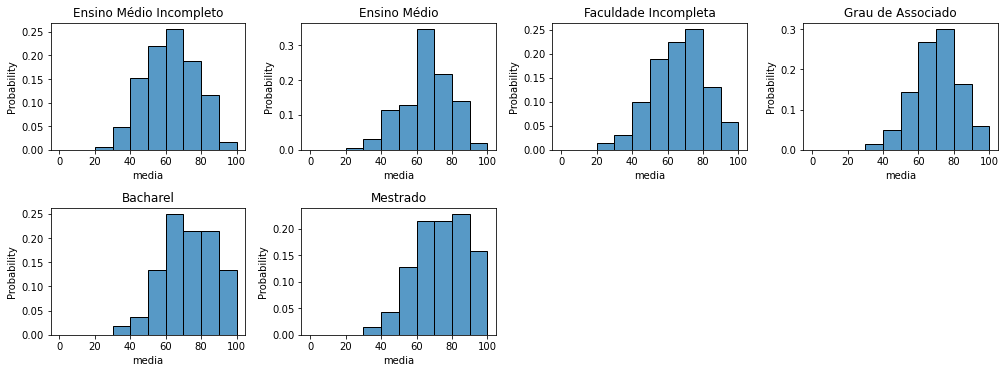

In [80]:
plt.figure(figsize=(14,10))
for i,col in enumerate(order_educ_parental):
    if col == "Ensino Médio Incompleto":
        dfx = df.query("educ_parental == 'Ensino Médio Incompleto'")
    elif col == "Ensino Médio":
        dfx = df.query("educ_parental == 'Ensino Médio'") 
    elif col == "Faculdade Incompleta":
        dfx = df.query("educ_parental == 'Faculdade Incompleta'")
    elif col == "Grau de Associado":
        dfx = df.query("educ_parental == 'Grau de Associado'")
    elif col == "Bacharel":
        dfx = df.query("educ_parental == 'Bacharel'")
    else:
        dfx = df.query("educ_parental == 'Mestrado'")
    axes = plt.subplot(4,4, i + 1)
    sns.histplot(x=dfx["media"], stat="probability",bins=[0,10,20,30,40,50,60,70,80,90,100]).set(title= col)

plt.tight_layout()
plt.show()

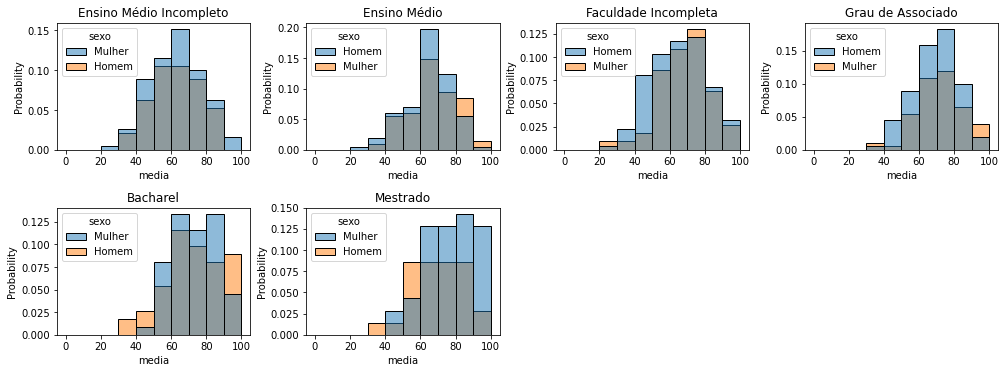

In [61]:
plt.figure(figsize=(14,10))
for i,col in enumerate(order_educ_parental):
    if col == "Ensino Médio Incompleto":
        dfx = df.query("educ_parental == 'Ensino Médio Incompleto'")
    elif col == "Ensino Médio":
        dfx = df.query("educ_parental == 'Ensino Médio'") 
    elif col == "Faculdade Incompleta":
        dfx = df.query("educ_parental == 'Faculdade Incompleta'")
    elif col == "Grau de Associado":
        dfx = df.query("educ_parental == 'Grau de Associado'")
    elif col == "Bacharel":
        dfx = df.query("educ_parental == 'Bacharel'")
    else:
        dfx = df.query("educ_parental == 'Mestrado'")
    axes = plt.subplot(4,4, i + 1)
    sns.histplot(x=dfx["media"], hue=dfx["sexo"], stat="probability",bins=[0,10,20,30,40,50,60,70,80,90,100]).set(title= col)

plt.tight_layout()
plt.show()

### Gráfico de barras de estudantes COM e SEM curso preparatório

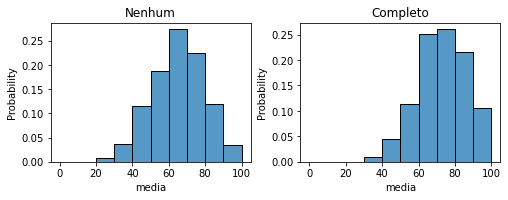

In [81]:
plt.figure(figsize=(14,10))
for i,col in enumerate(order_curso_preparatorio):
    if col == "Completo":
        dfx = df.query("curso_preparatorio == 'Completo'")
    else:
        dfx = df.query("curso_preparatorio == 'Nenhum'")
    axes = plt.subplot(4,4, i + 1)
    sns.histplot(x=dfx["media"], stat="probability",bins=[0,10,20,30,40,50,60,70,80,90,100]).set(title= col)

plt.tight_layout()
plt.show()

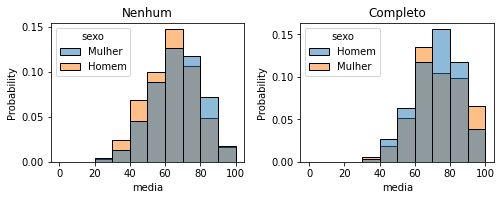

In [57]:
plt.figure(figsize=(14,10))
for i,col in enumerate(order_curso_preparatorio):
    if col == "Completo":
        dfx = df.query("curso_preparatorio == 'Completo'")
    else:
        dfx = df.query("curso_preparatorio == 'Nenhum'")
    axes = plt.subplot(4,4, i + 1)
    sns.histplot(x=dfx["media"], hue=dfx["sexo"], stat="probability",bins=[0,10,20,30,40,50,60,70,80,90,100]).set(title= col)

plt.tight_layout()
plt.show()

## Correlograma de Fatores e Heatmap

Até agora conseguimos analisar a relação estabelecida entre os objetos de cada fator e como eles modelam-se em cada nota para diferentes grupos. Mas também é possível mensurar o quão forte são essas relações, e para isso, iremos trabalhar com correlação.
Começamos criando um novo dataframe para armazenar as variáveis convertidas em indicadoras, através da função *.get_dummies()*

In [108]:
exams_dummy = pd.get_dummies(df)
exams_dummy.head()

,notas_matematica,notas_leitura,notas_redacao,media,sexo_Homem,sexo_Mulher,grupo_etnico_Grupo A,grupo_etnico_Grupo B,grupo_etnico_Grupo C,grupo_etnico_Grupo D,...,educ_parental_Bacharel,educ_parental_Ensino Médio,educ_parental_Ensino Médio Incompleto,educ_parental_Faculdade Incompleta,educ_parental_Grau de Associado,educ_parental_Mestrado,lanche_Com Desconto,lanche_Sem Desconto,curso_preparatorio_Completo,curso_preparatorio_Nenhum
0,67,67,63,65.666667,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,1,0
1,40,59,55,51.333333,0,1,0,0,0,1,...,0,0,1,0,0,0,1,0,0,1
2,59,60,50,56.333333,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
3,77,78,68,74.333333,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
4,78,73,68,73.000000,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0


Agora já é possível criar um correlograma com todas as correlações de qualquer objeto em qualquer categoria. Obtemos a seguinte visualização:

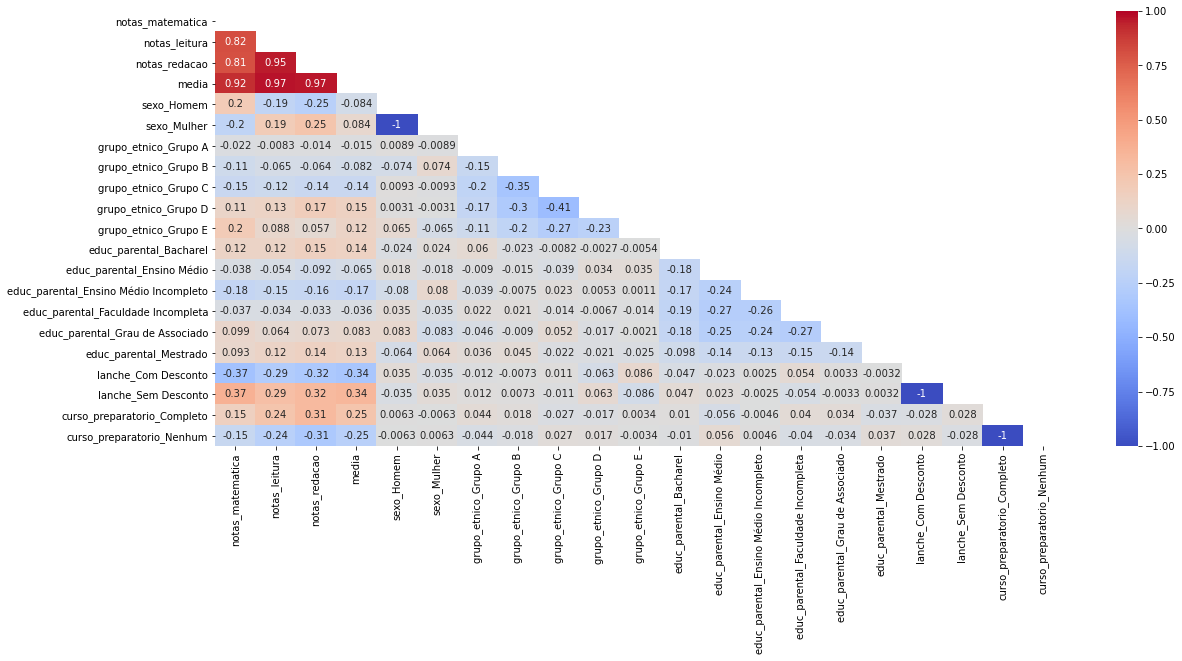

In [109]:
corr = exams_dummy.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(19, 8))
sns.heatmap(corr, vmin=-1, vmax=1, mask=mask, annot=True, cmap='coolwarm')
plt.show()

Vamos analisar as 4 primeiras colunas. Como esperado, todos os valores de notas estão no topo por possuirem as maiores correlações entre si, já em sexo observamos novamente uma correlação positiva de "0.2" para homens em matemática e mulheres com "0.19" e "0.25 "em leitura e redação respectivamente. 
Os grupos por outro lado, estão no geral bem constantes com pouca diferença de desempenho na média e matérias, há um leve destaque para o grupo D e E em todas as matérias. 

Agora observando os fatores, encontramos que as correlações mais significativas se encontram nos lanches, onde há uma correlação negativa de cerca de "0.3" para todos os estudantes que tem lanche COM desconto ou de graça, em todas as matérias. 
Em seguida, há uma correlação considerável de cerca de "0.25", entre estudantes COM curso preparatório. Por último, a educação parental dos pais não obteve destaque em nenhuma matéria, visto que mal chegam em "0.1", apesar de manterem o fluxo de ordem já observado anteriormente. 

Para ter uma visão geral, graficamos o heatmap abaixo que mede a correlação de todos os objetos com a MÉDIA das notas das matérias. O heatmap é uma excelente opção para visualizar correlação, visto que segue uma ordem com as cores e facilita a leitura de cada item.

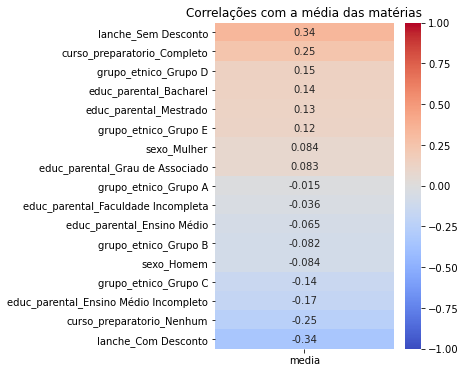

In [112]:
plt.figure(figsize=(4, 6))
heatmap = sns.heatmap(corr[['media']].sort_values(by='media', ascending=False)[4:], 
                      vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Correlações com a média das matérias')
plt.show()

Apesar de ser visualmente mais simples que o correlograma, no dashboard o usuário poderá definir o fator que deseja ver a correlação. Assim como a matéria em questão.

## Conclusões